<b><h3>Task 1: Loading and Exploring a Dataset in Pandas</h3></b>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('languages_and_dialects_geo.csv')

<b> a) What are the columns and their value ranges?</b>

In [5]:
df.shape

(22111, 7)

In [6]:
df.columns

Index(['glottocode', 'name', 'isocodes', 'level', 'macroarea', 'latitude',
       'longitude'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22111 entries, 0 to 22110
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   glottocode  22111 non-null  object 
 1   name        22111 non-null  object 
 2   isocodes    8121 non-null   object 
 3   level       22111 non-null  object 
 4   macroarea   22019 non-null  object 
 5   latitude    8849 non-null   float64
 6   longitude   8849 non-null   float64
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


In [8]:
df.head()

,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN


<b>b) How many entries does this database of languages and dialects have?</b>

In [10]:
df.describe(include='all')

,glottocode,name,isocodes,level,macroarea,latitude,longitude
count,22111,22111,8121,22111,22019,8849.000000,8849.000000
unique,22111,22111,8121,2,6,NaN,NaN
top,3adt1234,3Ad-Tekles,aiw,dialect,Eurasia,NaN,NaN
freq,1,1,1,13507,7011,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,8.935550,50.715108
std,NaN,NaN,NaN,NaN,NaN,19.603034,80.979511
min,NaN,NaN,NaN,NaN,NaN,-55.274800,-178.785000
25%,NaN,NaN,NaN,NaN,NaN,-5.086930,7.213910
50%,NaN,NaN,NaN,NaN,NaN,6.842170,47.837900
75%,NaN,NaN,NaN,NaN,NaN,21.572100,123.156317


In [11]:
num_entries=len(df)
print(f'total entries : {num_entries} ')

total entries : 22111 


<b> c) What is the full inventory of macroareas into which this dataset partitions languages?</b>

In [13]:
macroarea=df['macroarea'].unique()
macroarea_unique_count=df['macroarea'].unique().size
macroarea_tot_count=df['macroarea'].count()
print(f'Toatl macroarea:  {macroarea_tot_count}')
print(f'Unique macroarea count : {macroarea_unique_count}')
print(f'Unique macroarea : {macroarea}')

Toatl macroarea:  22019
Unique macroarea count : 7
Unique macroarea : ['Africa' 'Papunesia' 'Eurasia' 'South America' 'North America'
 'Australia' nan]


<b><h3> Task 2: Missing Data</h3></b>

<b>a) How many languages and dialects have an ISO 639-3 code associated with them?</b>

In [16]:


count_with_iso = df['isocodes'].notnull().sum()  # Counts non-null ISO codes
count_non_empty_iso = df['isocodes'].str.strip().ne('').sum()  # Counts non-empty ISO codes


print(f'Total ISO 639-3 code (non-null): {count_with_iso}')
print(f'Total  non-empty ISO 639-3 code: {count_non_empty_iso}') 

Total ISO 639-3 code (non-null): 8121
Total  non-empty ISO 639-3 code: 22111


<b>b) For how many languages and dialects do we have latitude and longitude data?</b>

In [18]:
latitude=df['latitude'].notnull().count()
longitude=df['longitude'].notnull().count()
print(f'Toatl latitute count (not null) : {latitude}  / {df['latitude'].notnull().count()}')
print(f'Toatl longitude count (not null) : {longitude} / {df['longitude'].notnull().count()}')

Toatl latitute count (not null) : 22111  / 22111
Toatl longitude count (not null) : 22111 / 22111


<b><h3> Task 3: Visualising Simple Distributions</h3></b>

<b> a) Use Seaborn to visualise the distribution of languages (not dialects) across macroareas in a useful format.</b>

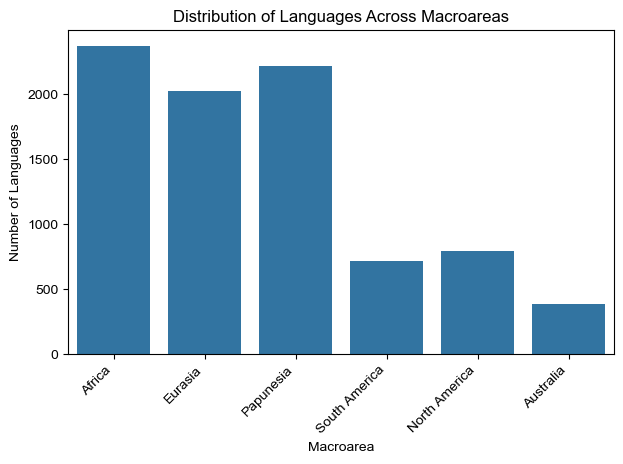

In [21]:
df_languages = df[df['level'] == 'language']

sns.countplot(data=df_languages, x='macroarea' )
sns.set_theme(style="darkgrid")

plt.title('Distribution of Languages Across Macroareas')
plt.xlabel('Macroarea')
plt.ylabel('Number of Languages')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

<b>b)  Create a stacked bar plot in Seaborn to visualise which percentage of languages in each macroarea have
 ISO 639-3 codes associated with them</b>
 

C:\Users\Shashikala\AppData\Local\Temp\ipykernel_9752\3265798655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_languages.loc[:, 'has_isocode'] = df_languages['isocodes'].notna()


<Figure size 1200x800 with 0 Axes>

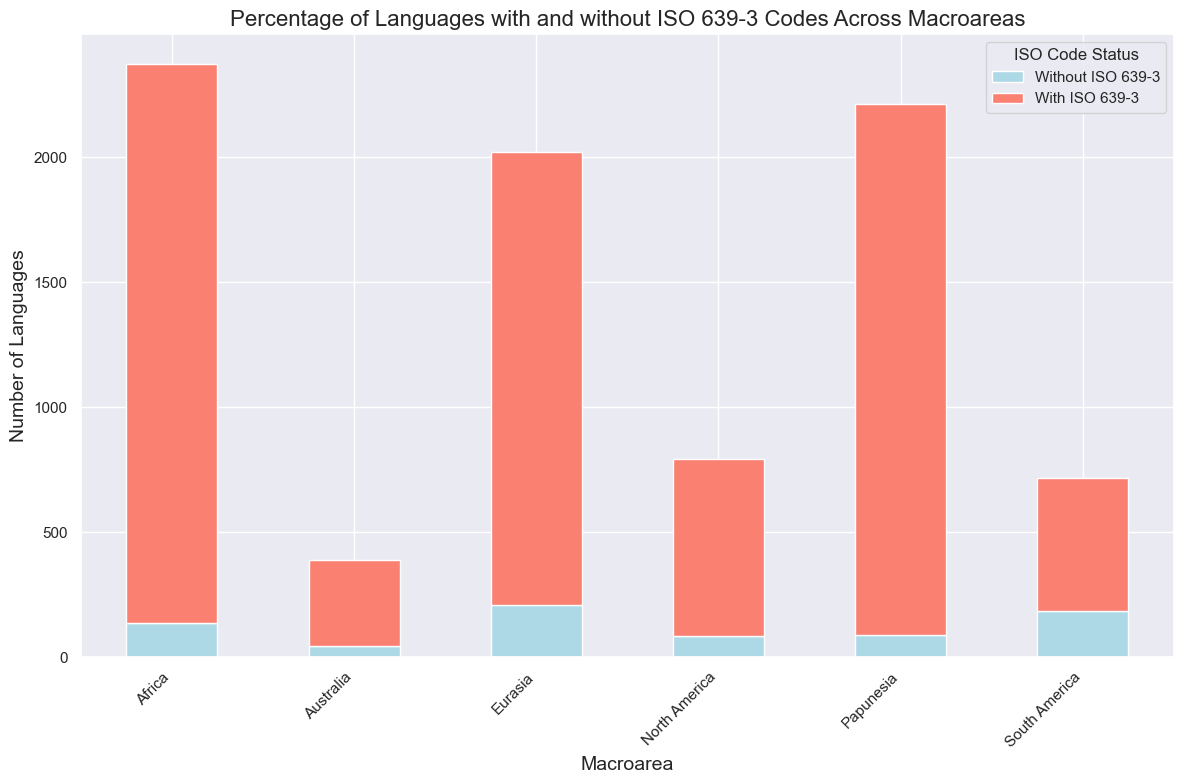

In [23]:

# check for  ISO 639-3 code
df_languages.loc[:, 'has_isocode'] = df_languages['isocodes'].notna()


# Group by 'macroarea' and calculate the count of languages with and without ISO 639-3 codes
grouped = df_languages.groupby(['macroarea', 'has_isocode']).size().unstack(fill_value=0)

#print(grouped)

# Create a stacked bar plot
plt.figure(figsize=(12, 8))

# Plot the stacked bar plot
grouped.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(12, 8))

# Customize the plot
plt.title('Percentage of Languages with and without ISO 639-3 Codes Across Macroareas', fontsize=16)
plt.xlabel('Macroarea', fontsize=14)
plt.ylabel('Number of Languages', fontsize=14)

plt.legend(['Without ISO 639-3', 'With ISO 639-3'], title='ISO Code Status')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show()


<b>Can you draw any conclusion from the differences between areas?</b>
<li>Africa, Eurasia, and Australia have a high number of languages with ISO code</li>
<li>Eurasia and South America show a slightly higher proportion of languages without ISO codes</li>

<b><h3> Task 4: Exploring Extreme Locations</h3></b> 

<b> a) Extract name and macroarea of the northernmost and the southernmost languages for which we have data.</b>

In [27]:
northernmost = df_languages.loc[df_languages['latitude'].idxmax()]

southernmost = df_languages.loc[df_languages['latitude'].idxmin()]

print(f"Northernmost Language: {northernmost['name']}, Macroarea: {northernmost['macroarea']}")
print(f"Southernmost Language: {southernmost['name']}, Macroarea: {southernmost['macroarea']}")


Northernmost Language: Nganasan, Macroarea: Eurasia
Southernmost Language: Yámana, Macroarea: South America


<b>b) Whichpercentage of the world’s languages are spoken in the tropics (between 23.43619°N and 23.43619°S)?</b>

In [29]:
tropical_latitude_min = -23.43619
tropical_latitude_max = 23.43619

#filter data
filtered_count=df_languages[(df_languages['latitude'] >= tropical_latitude_min) & (df_languages['latitude'] <= tropical_latitude_max)]

num_languages_in_tropics = filtered_count.shape[0]
total_languages = df_languages.shape[0]

percentage_in_tropics = (num_languages_in_tropics / total_languages) * 100

print(f"Filtered percentage of languages : {percentage_in_tropics:.2f}%")

Filtered percentage of languages : 73.18%


<b>c)</b>

In [31]:

northernmost_lat = northernmost['latitude']
northernmost_lon = northernmost['longitude']

df_languages['distance_to_north'] = (
    np.degrees(np.arccos(
        np.sin(np.radians(northernmost_lat)) * np.sin(np.radians(df_languages['latitude'])) +
        np.cos(np.radians(northernmost_lat)) * np.cos(np.radians(df_languages['latitude'])) *
        np.cos(np.radians(df_languages['longitude']) - np.radians(northernmost_lon))
    )) * 6371  
)

sorted_languages = df_languages[['name', 'macroarea', 'distance_to_north']].sort_values(by='distance_to_north', ascending=False)

furthest_language = sorted_languages.iloc[0]

# Find the southernmost language
southernmost = df_languages.loc[df_languages['latitude'].idxmin()]

print(f"The furthest language from the northernmost language is {furthest_language['name']} from {furthest_language['macroarea']} "
      f"with a distance of {furthest_language['distance_to_north']:.2f} km.")
print(f"The southernmost language is {southernmost['name']} from {southernmost['macroarea']} with a latitude of {southernmost['latitude']}.")

if furthest_language['name'] == southernmost['name']:
    print("The furthest language is the southernmost language.")
else:
    print("The furthest language is not the southernmost language.")


The furthest language from the northernmost language is Yámana from South America with a distance of 1015140.38 km.
The southernmost language is Yámana from South America with a latitude of -55.2748.
The furthest language is the southernmost language.


C:\Users\Shashikala\AppData\Local\Temp\ipykernel_9752\1654300299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_languages['distance_to_north'] = (


<b>Observations</b>
<p>The southernmost language is Yámana its the one located the furthest south.
In the spherical geometry of the Earth, the furthest distance from the northernmost point occurs when you go to the southernmost latitude, as the northernmost and southernmost points are nearly on opposite sides of the Earth.
Thus, it makes sense that in this case, Yámana is both the southernmost and the furthest language from the northernmost language.</p>

<b><h3> Task 5: Density of Languages</h3></b> 

<b> a) Use the pd.Series.quantile() function to find out the latitude range which covers the central half of
 the world’s languages. Is it symmetric around the equator?</b>

In [35]:
q1 = df_languages['latitude'].quantile(0.25)
q3 = df_languages['latitude'].quantile(0.75)

# latitude range 
latitude_range = (q1, q3)

print(f"The latitude range covering the central half of the world's languages is from {latitude_range[0]:.2f}° to {latitude_range[1]:.2f}°.")

# Check if the range is symmetric around the equator 
distance_from_equator_q1 = abs(q1)
distance_from_equator_q3 = abs(q3)


if distance_from_equator_q1 == distance_from_equator_q3:
    print("The latitude range is symmetric around the equator.")
else:
    print("The latitude range is not symmetric around the equator.")


The latitude range covering the central half of the world's languages is from -5.02° to 20.16°.
The latitude range is not symmetric around the equator.


<b> b) Estimate the area covered by each macroarea by computing the distances (see Task 4c) between 1000
 random pairs of languages from the area, taking the two largest distances and , and assuming they
 indicate the lengths of the semi-major and semi-minor axes of an ellipsis-shaped area</b>

In [44]:

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)
    
    # Calculate the cosine of the angle using the spherical law of cosines
    cos_angle = (np.sin(lat1_rad) * np.sin(lat2_rad) +
                 np.cos(lat1_rad) * np.cos(lat2_rad) * np.cos(lon2_rad - lon1_rad))
    
    # Clip the cosine value to ensure it is within the valid range for arccos
    cos_angle = np.clip(cos_angle, -1, 1)
    
    # Calculate the distance
    distance = np.arccos(cos_angle) * 6371  # Earth's radius in kilometers
    return distance


In [46]:
def estimate_area_for_macroarea(macroarea_df, n_random_pairs=1000):
    if macroarea_df.empty:
        print("No data available for this macroarea.")
        return 0, 0, 0  # Return area as 0 or handle appropriately
    
    random_pairs = macroarea_df.sample(n=n_random_pairs, replace=True)
    
    # Calculate distances for the random pairs
    distances = []
    for i in range(len(random_pairs)):
        for j in range(i + 1, len(random_pairs)):
            lat1, lon1 = random_pairs.iloc[i][['latitude', 'longitude']]
            lat2, lon2 = random_pairs.iloc[j][['latitude', 'longitude']]
            distance = calculate_distance(lat1, lon1, lat2, lon2)
            distances.append(distance)
    
    # two largest distances 
    distances = sorted(distances, reverse=True)
    semi_major_axis = distances[0]  # Largest distance
    semi_minor_axis = distances[1]  # Second largest distance
    
    #  area of the ellipse 
    area = np.pi * (semi_major_axis / 2) * (semi_minor_axis / 2)  # Area of ellipse
    return area, semi_major_axis, semi_minor_axis

In [48]:

for macroarea in df['macroarea'].unique():
    macroarea_df = df_languages[df_languages['macroarea'] == macroarea]

# Estimate the area for the selected macroarea
    area, semi_major, semi_minor = estimate_area_for_macroarea(macroarea_df)

# Output the results
    print(f"Estimated area for {macroarea}: {area:.2f} km²")
    print(f"Semi-major axis: {semi_major:.2f} km, Semi-minor axis: {semi_minor:.2f} km")


Estimated area for Africa: 43856683.62 km²
Semi-major axis: 8625.59 km, Semi-minor axis: 6473.77 km
Estimated area for Papunesia: 120925773.87 km²
Semi-major axis: 13581.11 km, Semi-minor axis: 11336.89 km
Estimated area for Eurasia: nan km²
Semi-major axis: nan km, Semi-minor axis: 9652.70 km
Estimated area for South America: nan km²
Semi-major axis: nan km, Semi-minor axis: nan km
Estimated area for North America: nan km²
Semi-major axis: nan km, Semi-minor axis: nan km
Estimated area for Australia: 11860107.72 km²
Semi-major axis: 3910.20 km, Semi-minor axis: 3861.89 km
No data available for this macroarea.
Estimated area for nan: 0.00 km²
Semi-major axis: 0.00 km, Semi-minor axis: 0.00 km


<b> c) Estimate the densities of languages in each macroarea by dividing the number of languages in the areas
 by the sizes computed in b), and visualise the differences in a bar plot.</b>

No data available for this macroarea.


C:\Users\Shashikala\AppData\Local\Temp\ipykernel_9752\53830535.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='density', y='macroarea', data=density_df, palette='viridis')


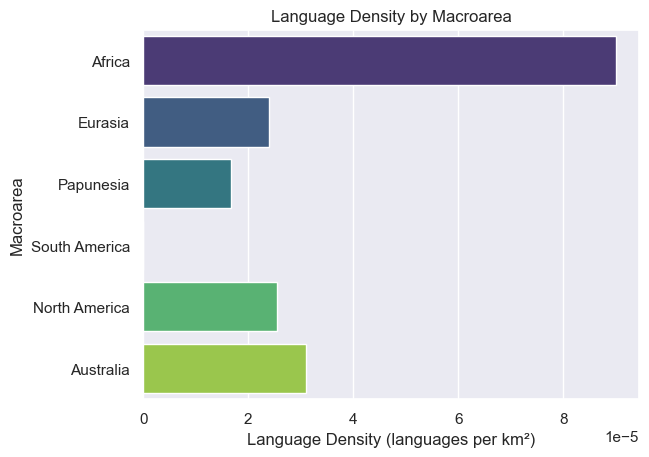

In [56]:
macroarea_densities = []

for macroarea in df_languages['macroarea'].unique():
    macroarea_df = df_languages[df_languages['macroarea'] == macroarea]
    
    num_languages = len(macroarea_df)
    
    area, semi_major, semi_minor = estimate_area_for_macroarea(macroarea_df)
    
    if area > 0:
        density = num_languages / area  
    else:
        density = 0
    
    macroarea_densities.append({
        'macroarea': macroarea,
        'num_languages': num_languages,
        'area_km2': area,
        'density': density
    })

density_df = pd.DataFrame(macroarea_densities)

sns.barplot(x='density', y='macroarea', data=density_df, palette='viridis')
plt.title('Language Density by Macroarea')
plt.xlabel('Language Density (languages per km²)')
plt.ylabel('Macroarea')
plt.show()


<b><h3> Task 6: Gaps in Longitude and Neighbour Density</h3></b> 

<b> a) Between which two languages do we find the largest gap in longitude, i.e. the longest stretch in west-east
 direction which is not inhabited by any other language?</b>

In [88]:
df_sorted = df_languages.sort_values(by='longitude')

# Calculate the differences 
df_sorted['longitude_diff'] = df_sorted['longitude'].diff().shift(-1)

# remove NaN 
df_sorted = df_sorted.dropna(subset=['longitude_diff'])

# Reset the index to avoid out-of-bounds errors
df_sorted.reset_index(drop=True, inplace=True)

if not df_sorted['longitude_diff'].empty:
    #  index of the maximum gap
    max_gap_idx = df_sorted['longitude_diff'].idxmax()

    #  languages corresponding to the largest gap
    language1 = df_sorted.iloc[max_gap_idx]
    language2 = df_sorted.iloc[max_gap_idx + 1]

    # gap in longitude
    gap = language2['longitude'] - language1['longitude']

   
    print(f"The largest gap in longitude is between {language1['name']} and {language2['name']} with a gap of {gap:.2f} degrees.")
else:
    print("data not found.")


The largest gap in longitude is between Tarairiu and Kabuverdianu with a gap of 12.54 degrees.


<b> b) How about the largest gap in longitude among languages of the Southern Hemisphere?</b>

In [104]:
df_sorted_south = df_southern_hemisphere.sort_values(by='longitude')
df_sorted_south['longitude_diff'] = df_sorted_south['longitude'].diff().shift(-1)

# remove NaN 
df_sorted_south = df_sorted_south.dropna(subset=['longitude_diff'])

# Calculate the max gap index
max_gap_idx_south = df_sorted_south['longitude_diff'].idxmax()
print(f"Max gap index: {max_gap_idx_south}")

# Check if the max gap index is within the DataFrame's bounds
# Check if the max gap index is within the valid range
if max_gap_idx_south + 1 < len(df_sorted_south):
    language1_south = df_sorted_south.iloc[max_gap_idx_south]
    language2_south = df_sorted_south.iloc[max_gap_idx_south + 1]

    gap_south = language2_south['longitude'] - language1_south['longitude']
    print(f"The largest gap in longitude in the Southern Hemisphere is between {language1_south['name']} and {language2_south['name']} with a gap of {gap_south:.2f} degrees.")
else:
    print("-")



Max gap index: 18788
-


<b> c) Add a new column to your dataframe in which you store how distant each language is from its closest
 neighbour, again using the distance formula from 4c). Plot the distributions for the macroareas as a boxplot
 which include visualisation of outliers. Are these outliers actually the most isolated languages? Why (not)?</b>

In [106]:
def closest_neighbour_distances(df):
    distances = []
    
    for idx, lang1 in df.iterrows():
        min_distance = np.inf
        for _, lang2 in df.iterrows():
            if idx != lang2.name:  
                distance = calculate_distance(lang1['latitude'], lang1['longitude'], lang2['latitude'], lang2['longitude'])
                if distance < min_distance:
                    min_distance = distance
        distances.append(min_distance)
    
    df['closest_neighbour_distance'] = distances
    return df

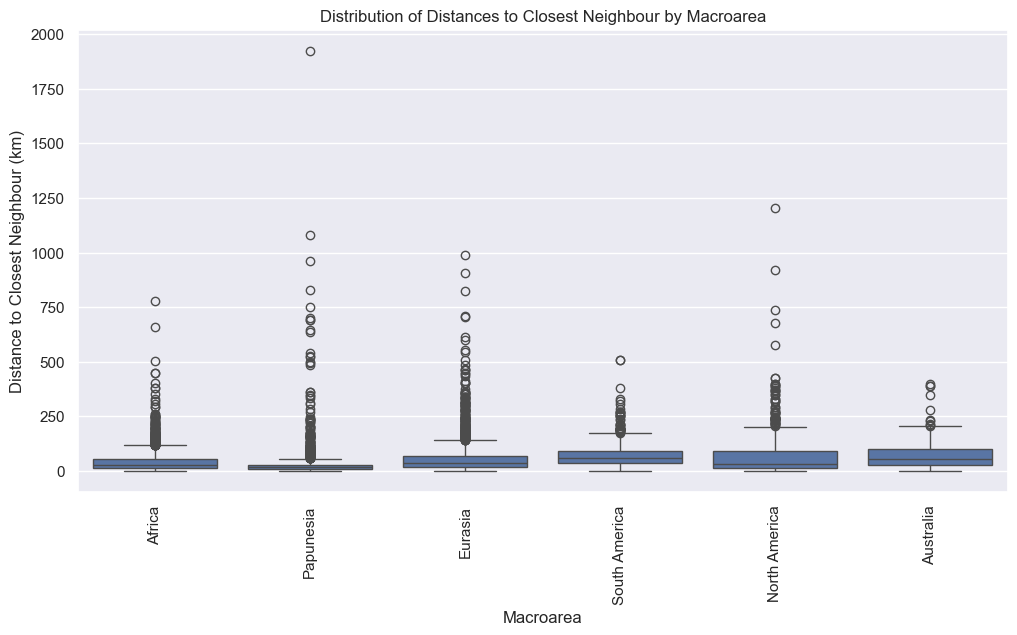

In [108]:
df_languages = closest_neighbour_distances(df_languages)

plt.figure(figsize=(12, 6))
sns.boxplot(x='macroarea', y='closest_neighbour_distance', data=df_languages)
plt.title('Distribution of Distances to Closest Neighbour by Macroarea')
plt.xlabel('Macroarea')
plt.ylabel('Distance to Closest Neighbour (km)')
plt.xticks(rotation=90)
plt.show()
